In [45]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,5)

def order_dict(x):
    return {k: v for k, v in sorted(x.items(), key=lambda item: item[1])} 

In [15]:
df = pd.read_excel('data.xlsx')
df

,City,District,Price,Brand,Series,Model,Year,Fuel,Tranmission,Km,Chasis,Power,Engine,Drive,Color,From
0,Balıkesir,Edremit,70000.0,Peugeot,607,2.7 HDi Ivoire,2007,Dizel,Otomatik,150000,Sedan,201,2501,Forward,Lacivert,Owner
1,Ankara,Çankaya,92000.0,BMW,3 Serisi,320d Standart,2011,Dizel,Otomatik,106000,Sedan,176,1801,Back,Füme,Owner
2,Ankara,Altındağ,22500.0,Tofaş,Murat,124,1976,Benzin,Manuel,1453,Sedan,65,1239,Back,Mavi,Dealer
3,İzmir,Çiğli,19499.0,Rover,220,Turbo,1995,Benzin,Manuel,165000,Coupe,251,1801,Forward,Füme,Owner
4,Ankara,Çankaya,55000.0,Mercedes - Benz,S,S 500 500 L,1996,Benzin,Otomatik,265000,Sedan,301,4501,Back,Gümüş Gri,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Antalya,Kepez,31500.0,Mercedes - Benz,300,300 SEL,1992,Benzin & LPG,Manuel,312000,Sedan,226,3001,Back,Siyah,Dealer
9996,Balıkesir,Burhaniye,77250.0,Honda,Civic,1.6 i-VTEC Elegance,2014,Benzin,Otomatik,21242,Sedan,101,1401,Forward,Gümüş Gri,Dealer
9997,Trabzon,Ortahisar,40000.0,Mini,Cooper,1.6,2005,Benzin,Manuel,148000,Hatchback 3 kapı,115,1598,Forward,Mavi,Owner
9998,Giresun,Bulancak,11000.0,Fiat,Tempra,1.6 SX,1991,Benzin & LPG,Manuel,168956,Sedan,76,1401,Forward,Mavi,Dealer


# Car Prices by Years

<BarContainer object of 47 artists>

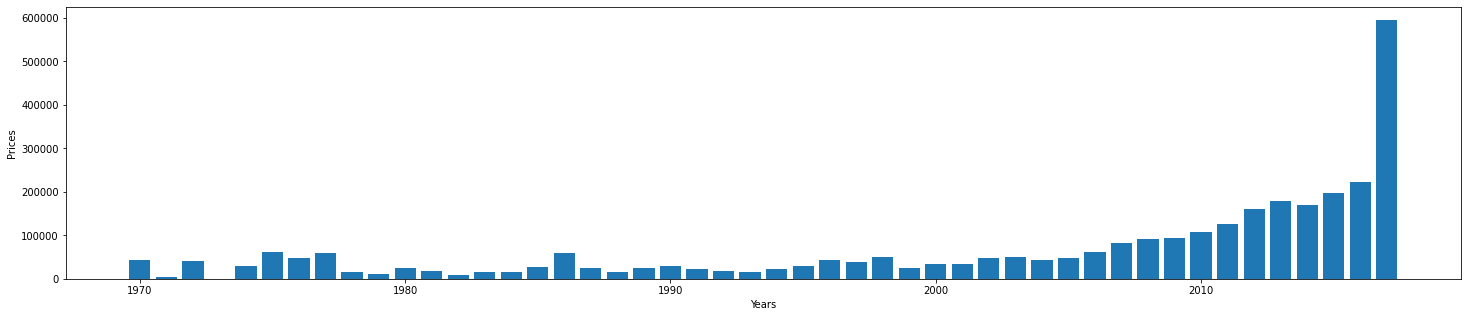

In [37]:
mean_prices = df.groupby("Year").mean().to_dict()["Price"] # By year

plt.ylabel("Prices")
plt.xlabel("Years")
plt.bar(mean_prices.keys(), mean_prices.values())

In [122]:
df.isna().sum()

City           0
District       0
Price          9
Brand          0
Series         0
Model          0
Year           0
Fuel           0
Tranmission    0
Km             0
Chasis         0
Power          0
Engine         0
Drive          0
Color          0
From           0
dtype: int64

<BarContainer object of 47 artists>

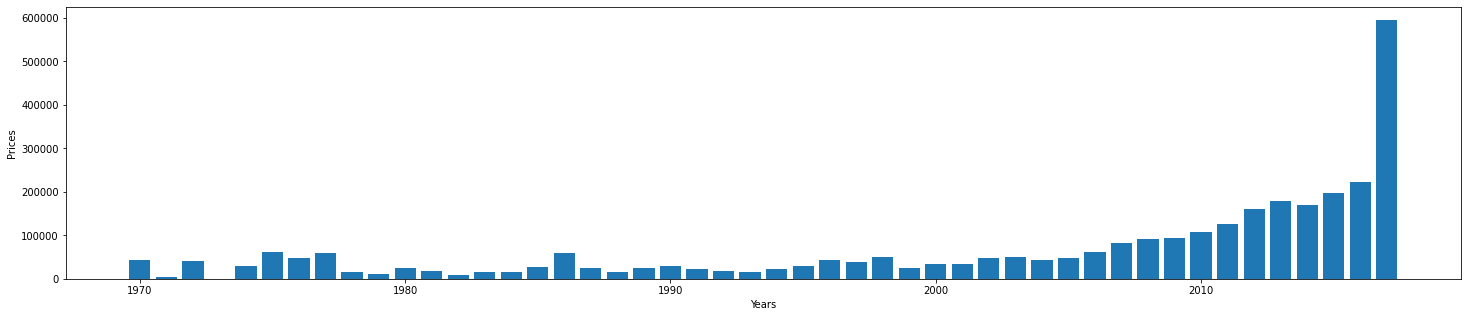

In [38]:
mean_prices = df.groupby("Year").mean().to_dict()["Price"] # By year
df.Price = df.Price.fillna(df.Year.map(mean_prices))

plt.ylabel("Prices")
plt.xlabel("Years")
plt.bar(mean_prices.keys(), mean_prices.values())

# Most Expensive Cars & Dropping Duplicate Rows

In [30]:
df = df.sort_values("Price")
df = df[~df.duplicated(subset=[col for col in df.columns if col != "Price"], keep='first')]
df

,City,District,Price,Brand,Series,Model,Year,Fuel,Tranmission,Km,Chasis,Power,Engine,Drive,Color,From
4144,İstanbul,Ümraniye,2850.0,Toyota,Corona,1.6 XL,1985,Benzin & LPG,Manuel,200000,Sedan,76,1601,Forward,Bordo,Dealer
3863,Rize,Fındıklı,3250.0,Renault,R 12,GTS,1983,Benzin,Manuel,110,Sedan,72,1397,Forward,Sarı,Dealer
9035,Kütahya,Merkez,3999.0,Tofaş,Şahin,Şahin 5 vites,1992,Benzin & LPG,Manuel,105000,Sedan,80,1581,Back,Beyaz,Dealer
580,Ankara,Çankaya,4950.0,Lada,Samara,1.5,1993,Benzin & LPG,Manuel,17989,Hatchback 5 kapı,68,1499,Forward,Beyaz,Dealer
8198,Kastamonu,Merkez,5000.0,Tofaş,Şahin,1.4,1986,Benzin & LPG,Manuel,19364,Sedan,51,1201,Back,Turkuaz,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,İstanbul,Şişli,3763290.0,Ferrari,488,Spider,2017,Benzin,Otomatik,195,Cabrio,601,3501,Back,Füme,Dealer
1920,İstanbul,Beşiktaş,4351000.0,Mercedes - Benz,Maybach S,S 600,2017,Benzin,Otomatik,0,Sedan,526,6001,4WD,Siyah,Dealer
95,İstanbul,Sarıyer,4568700.0,Ferrari,F Serisi,F12 Berlinetta,2015,Benzin,Otomatik,0,Coupe,601,6001,Back,Lacivert,Dealer
458,İstanbul,Kadıköy,5107500.0,Mercedes - Benz,S,S 600 600 L,2016,Benzin,Yarı Otomatik,0,Sedan,530,5980,Back,Siyah,Dealer


# Standard Deviations of Cars By Brands

<BarContainer object of 37 artists>

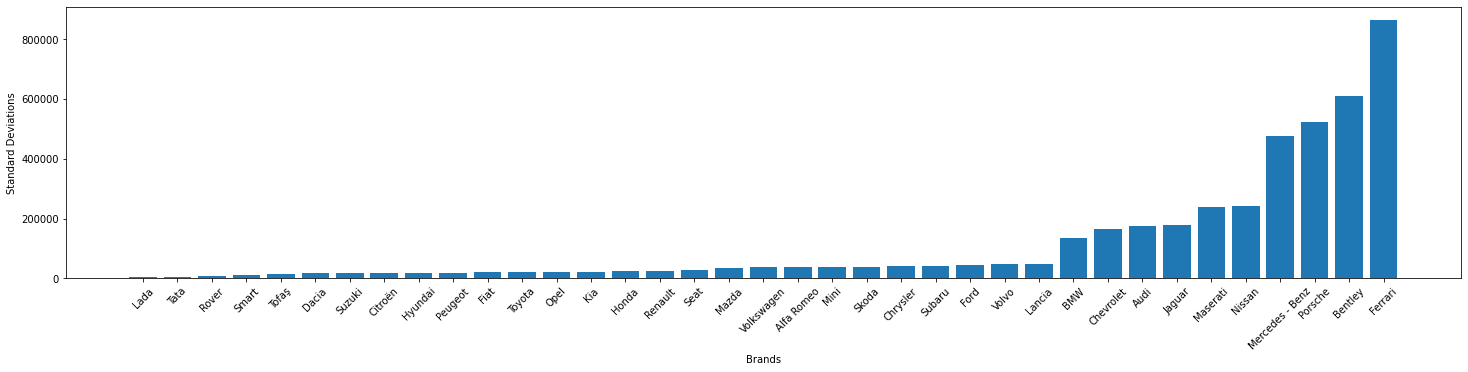

In [96]:
std_prices = df.groupby("Brand").std().to_dict()["Price"] # By brand

std_prices = order_dict(std_prices)
plt.ylabel("Standard Deviations")
plt.xlabel("Brands")
plt.xticks(rotation=45)
plt.bar(std_prices.keys(), std_prices.values())

# Mean Prices of Cars By Cities

<BarContainer object of 81 artists>

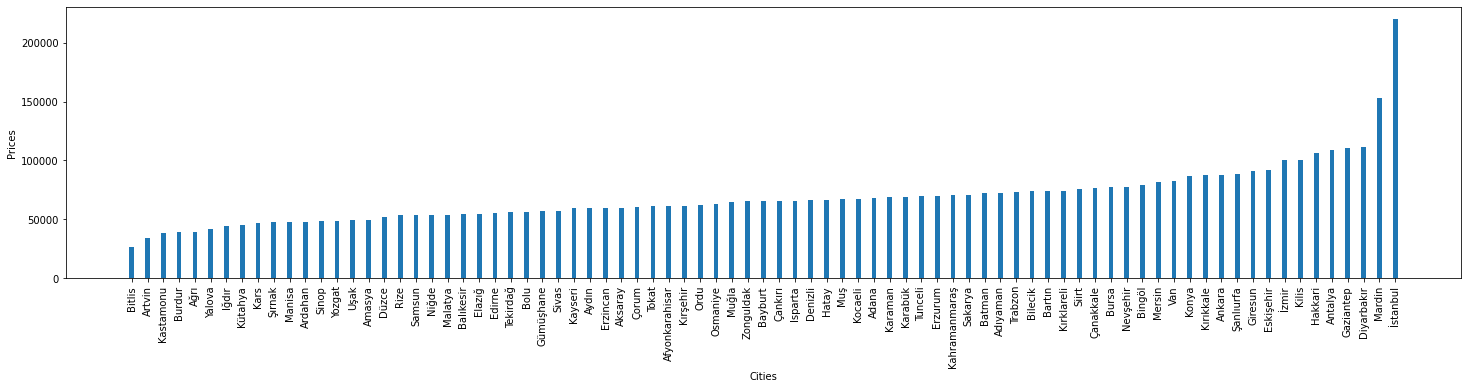

In [95]:
mean_prices = df.groupby("City").mean("Price").to_dict()["Price"] # By city

mean_prices = order_dict(mean_prices)
plt.ylabel("Prices")
plt.xlabel("Cities")
plt.xticks(rotation=90)
plt.bar(mean_prices.keys(), mean_prices.values(), width=0.3, align='center')

# Mean Prices of Cars By Brands

<BarContainer object of 37 artists>

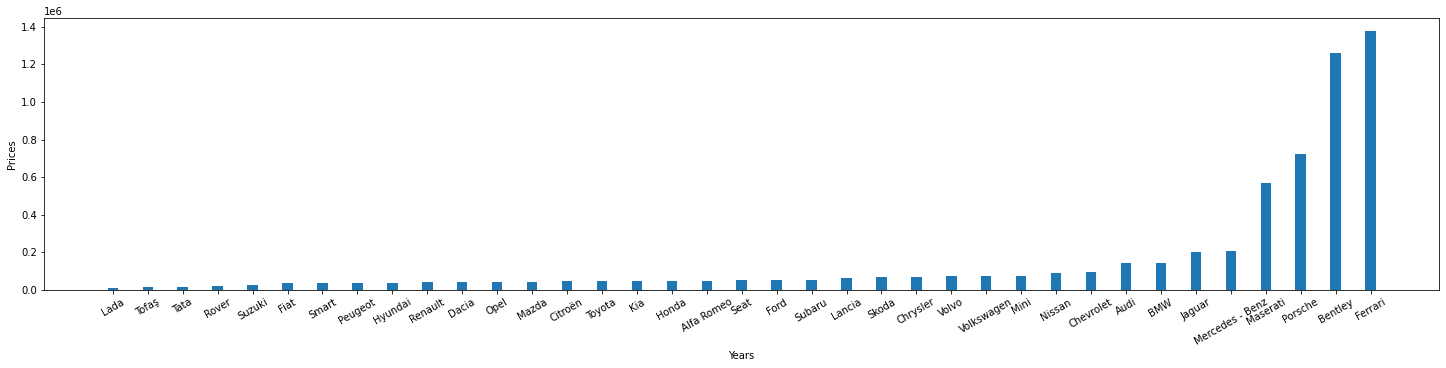

In [52]:
mean_prices = df.groupby("Brand").mean().to_dict()["Price"] # By brand

mean_prices = order_dict(mean_prices)
plt.ylabel("Prices")
plt.xlabel("Years")
plt.xticks(rotation=30)
plt.bar(mean_prices.keys(), mean_prices.values(), width=0.3, align='center')

<BarContainer object of 2 artists>

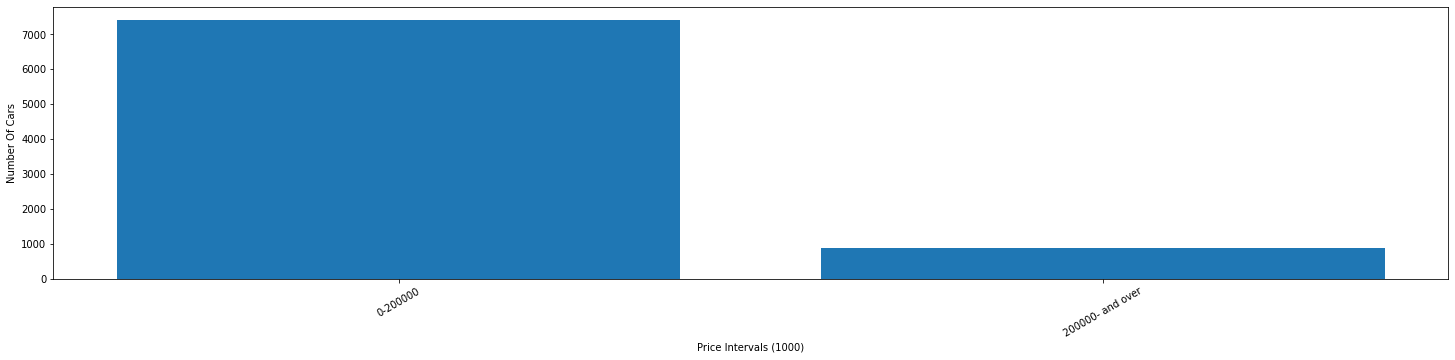

In [59]:
def find_matching_intervals(df, borders):
    """
    Find number of cars between the given borders. 
    Borders are multiplied by 1.000
    """
    counts = {}
    lower_b = 0
    for num in borders:
        num *= 1000
        key = "{}-{}".format(lower_b, num)

        counts[key]= df.loc[ # Numbers are scaled by thousand
                        (num > df.Price) & (df.Price > lower_b)
                    ].shape[0]
        lower_b = num

    last_key = "{}- and over".format(lower_b)
    counts[last_key] = df.loc[df.Price > lower_b].shape[0]
    return counts 

intervals = find_matching_intervals(df, [200])
plt.ylabel("Number Of Cars")
plt.xlabel("Price Intervals (1000)")
plt.xticks(rotation=30)
plt.bar(intervals.keys(), intervals.values())

<BarContainer object of 5 artists>

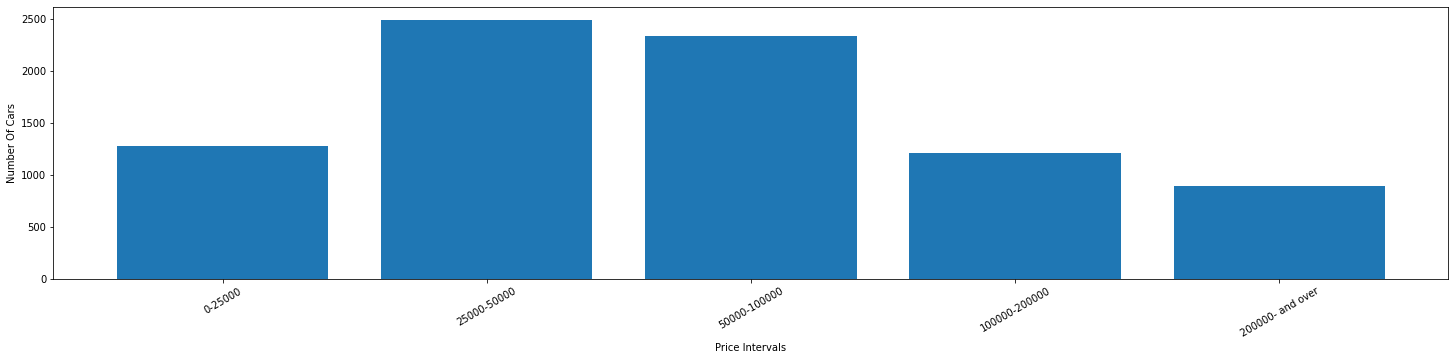

In [61]:
intervals = find_matching_intervals(df, [25, 50, 100, 200])
plt.ylabel("Number Of Cars")
plt.xlabel("Price Intervals")
plt.xticks(rotation=30)
plt.bar(intervals.keys(), intervals.values())

# Automatic and Manual Car Price Ranges

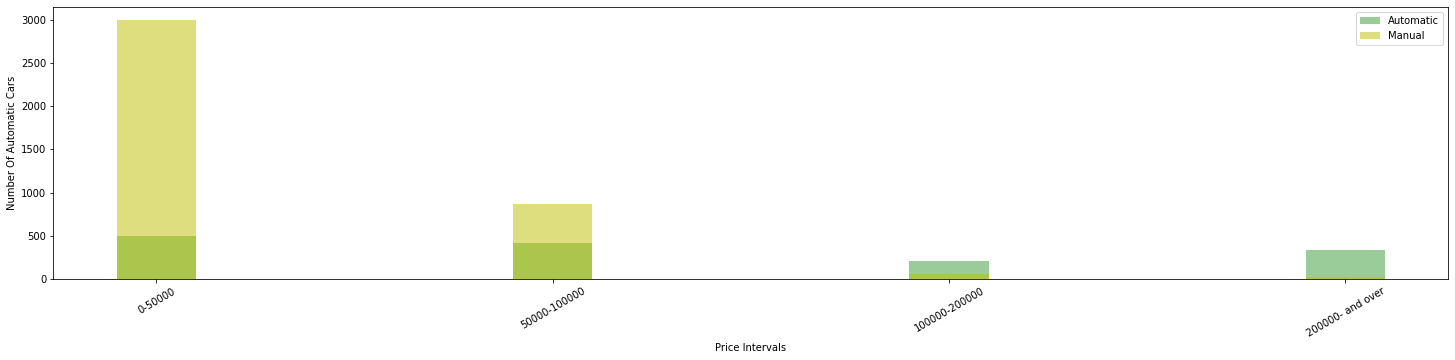

In [88]:
automatic_cars = df.loc[df.Tranmission == "Otomatik"]
manual_cars = df.loc[df.Tranmission == "Manuel"]

automatic_intervals = find_matching_intervals(automatic_cars, [50,100, 200])
manual_intervals = find_matching_intervals(manual_cars, [50,100, 200])

plt.ylabel("Number Of Automatic Cars")
plt.xlabel("Price Intervals")
plt.xticks(rotation=30)
plt.bar(automatic_intervals.keys(), automatic_intervals.values(), width=0.2, alpha=0.4, color='g', label='Automatic')
plt.bar(manual_intervals.keys(), manual_intervals.values(), width=0.2, alpha=0.5, color='y', label='Manual')
plt.legend()

# Mean Prices of Automatic Cars

<BarContainer object of 32 artists>

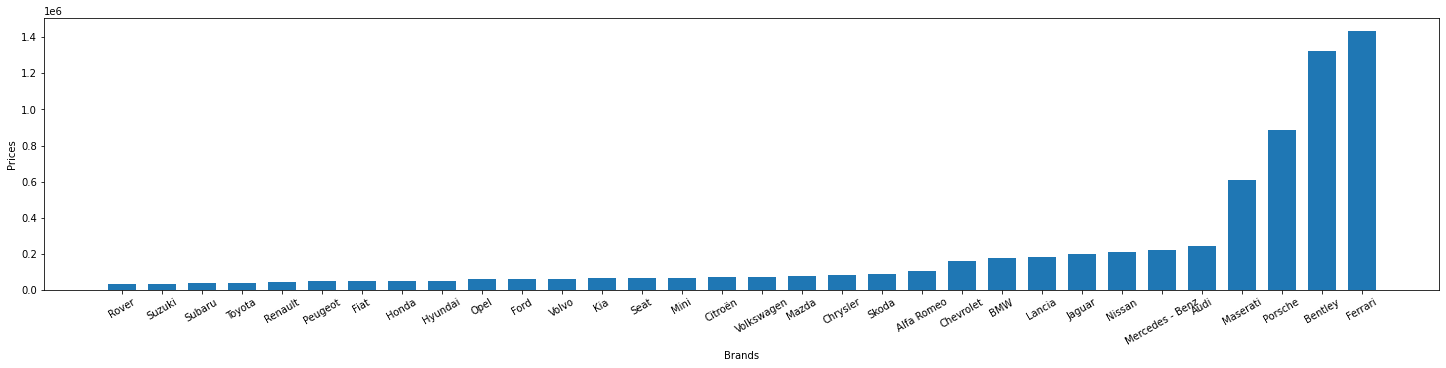

In [94]:
mean_prices = automatic_cars.groupby("Brand").mean()["Price"]

mean_prices = order_dict(mean_prices)
plt.ylabel("Prices")
plt.xlabel("Brands")
plt.xticks(rotation=30)
plt.bar(mean_prices.keys(), mean_prices.values(), width=0.7, align='center')

# Mean Prices of Manual Cars

<BarContainer object of 36 artists>

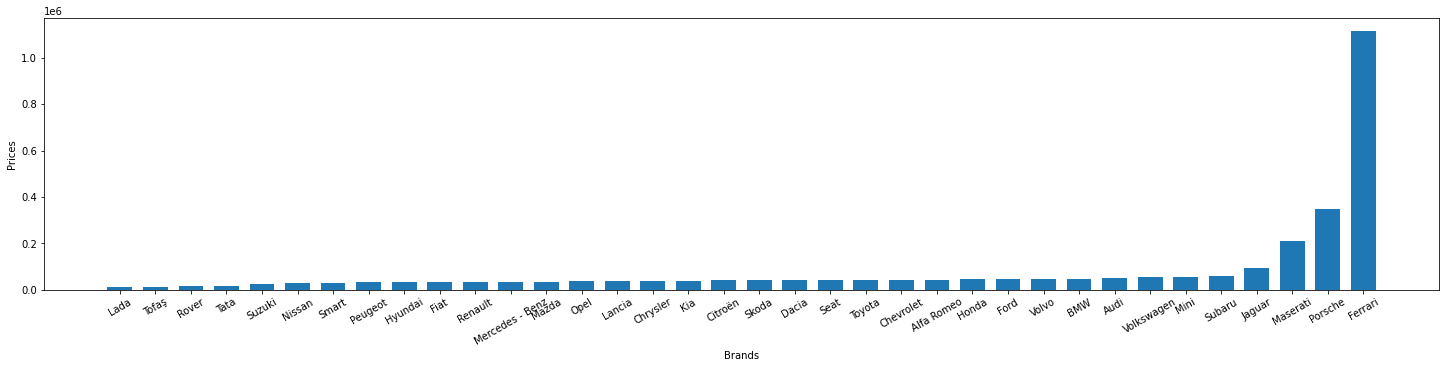

In [93]:
mean_prices = manual_cars.groupby("Brand").mean()["Price"]

mean_prices = order_dict(mean_prices)
plt.ylabel("Prices")
plt.xlabel("Brands")
plt.xticks(rotation=30)
plt.bar(mean_prices.keys(), mean_prices.values(), width=0.7, align='center')

<BarContainer object of 37 artists>

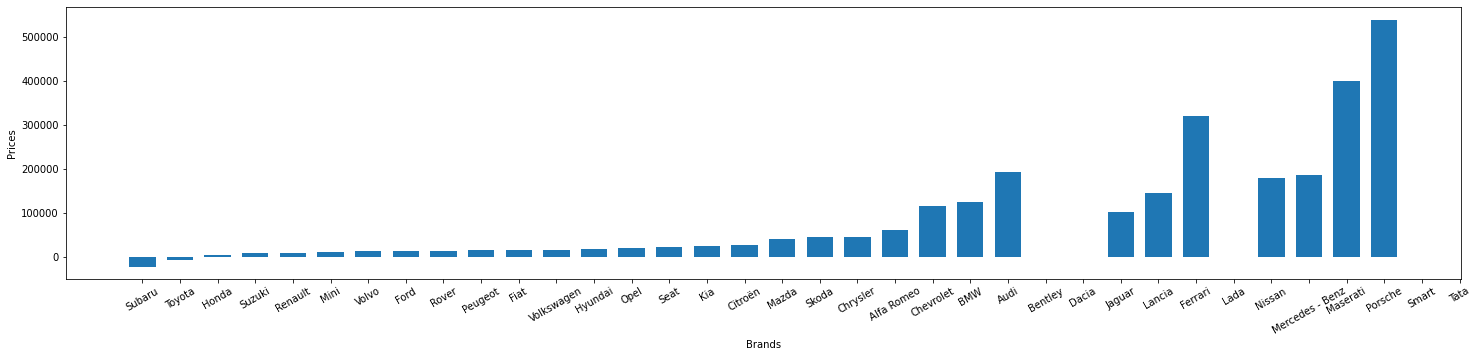

In [97]:
mean_price_diff = automatic_cars.groupby("Brand").mean()["Price"].subtract(
    manual_cars.groupby("Brand").mean()["Price"]
).to_dict()

mean_price_diff = order_dict(mean_price_diff)
plt.ylabel("Prices")
plt.xlabel("Brands")
plt.xticks(rotation=30)
plt.bar(mean_price_diff.keys(), mean_price_diff.values(), width=0.7, align='center')